In [0]:
import torch


# Parte 1: Preliminares: funciones de activación y función de error


## 1a) Derivando las funciones de activación

Derivadas de las funciones de activación. Omití el desarrollo puesto que no son de mayor complejidad estas derivadas.

<br>
\begin{equation}
\frac{\partial\ \text{relu}(x)}{\partial x} = 
\begin{cases}
1 & \text{si $x$ > 0}\\
0 & \text{si $x$ <= 0}
\end{cases}
\end{equation}
<br>

\begin{eqnarray}
\frac{\partial\ \text{swish}(x, \beta)}{\partial x} &=& \beta \cdot \text{swish}(x,\beta) \cdot (1 - \text{sigmoid}(\beta x)) + \text{sigmoid}(\beta x)\\
\frac{\partial\ \text{swish}(x, \beta)}{\partial \beta} &=&  \text{swish}(x,\beta) \cdot (x - \text{swish}(x,\beta)) \\
\end{eqnarray}
<br>

\begin{eqnarray}
\frac{\partial\ \text{celu}(x, \alpha)}{\partial x} & = & \begin{cases}
exp (\frac{x}{\alpha}) & \text{si $x$ < 0}\\
1 & \text{si $x$ >= 0}
\end{cases} \\
\frac{\partial\ \text{celu}(x, \alpha)}{\partial \alpha} & = & \begin{cases}
exp (\frac{x}{\alpha}) \cdot (1-\frac{x}{\alpha}) - 1  & \text{si $x$ < 0}\\
0 & \text{si $x$ >= 0}
\end{cases}\\
\end{eqnarray}


## 1b) Entropía Cruzada

In [0]:
# Definición de la función de pérdida para la red neuronal.

def CELoss(y_pred, y, epsilon=1e-7):
  N = y_pred.size()[0]
  y_pred.clamp_(epsilon, 1-epsilon)
  result = torch.sum(y*torch.log(1/y_pred))/N
  return result



  

# Parte 2: Más derivadas y back propagation

## 2a) Derivando la última capa

Escribe tu cálculo acá.
<br>
\begin{eqnarray}
\frac{\partial \cal{L}}{\partial u^{(L+1)}} = \frac{\partial \cal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial u^{(L+1)}} \\
\frac{\partial \cal{L}}{\partial u^{(L+1)}_{ij}} = \frac{\partial \cal{L}}{\partial \hat{y}_{kl}} \cdot \frac{\partial \hat{y}_{kl}}{\partial u^{(L+1)}_{ij}} \\
\frac{\partial \cal{L}}{\partial \hat{y}_{kl}}=\frac{-1}{N} \cdot  \frac{y_{kl}}{\hat{y}_{kl}}
\end{eqnarray}

Pero para que esto tenga sentido se necesita que k=i, ya que en caso contrario será 0 la derivada:

\begin{eqnarray}
\frac{\partial \hat{y}_{il}}{\partial u^{(L+1)}_{ij}} = \begin{cases}
\hat{y}_{il}(1-\hat{y}_{ij}), & \text{si } k = i, l = j\\
-\hat{y}_{ij}\hat{y}_{il}, & \text{si } k = i , l \not= j\\
0, & \text{si } k\not=i \\
\end{cases}
\end{eqnarray}


\begin{eqnarray}
\frac{\partial \cal{L}}{\partial u^{(L+1)}_{ij}} = \begin{cases}
\frac{-1}{N} {y}_{il}(1-\hat{y}_{ij}), & \text{si } l=j\\
\frac{1}{N} {y}_{il}\hat{y}_{ij}, & \text{si } l \not= j \\
\end{cases}
\end{eqnarray}


\begin{eqnarray}
\frac{\partial \cal{L}}{\partial u^{(L+1)}_{ij}} = \begin{cases}
\frac{-1}{N} y_{il}(1-\hat{y}_{ij}), & \text{si } l=j\\
\frac{1}{N} y_{il}\hat{y}_{ij}, & \text{si } l \not= j \\
\end{cases}
\end{eqnarray}


\begin{eqnarray}
\frac{\partial \cal{L}}{\partial u^{(L+1)}_{ij}} = \begin{cases}
\frac{y_{il}\hat{y}_{ij}}{N} - \frac{y_{il}}{N} , & \text{si } l=j\\
\frac{y_{il}\hat{y}_{ij}}{N} , & \text{si } l \not= j \\
\end{cases}
\end{eqnarray}

\begin{eqnarray}
\frac{\partial \cal{L}}{\partial u^{L+1}_{ij}} = (\Sigma_{l} \frac{y_{il}\hat{y}_{ij}}{N})- \frac{y_{ij}}{N} \\
\frac{\partial \cal{L}}{\partial u^{L+1}_{ij}} = \frac{\hat{y}_{ij}-y_{ij}}{N} \\
\frac{\partial \cal{L}}{\partial u^{(L+1)}}= \frac{\hat{y}-y}{N}
\end{eqnarray}




<br>

## 2b) Derivando la última capa (continuación)

Estas tres derivadas son análogas a las de la clase:
<br>

\begin{equation}
\frac{\partial\cal L}{\partial U} = h^{(L)}_{ji}\frac{\partial \cal{L}}{\partial u^{(L+1)}_{ik}} =  (h^{(L)})^T\frac{\partial \cal{L}}{\partial u^{(L+1)}} \\
\end{equation}
<br>

\begin{equation}
\frac{\partial\cal L}{\partial c} = sum(\frac{\partial \cal{L}}{\partial u^{(L+1)}_{ij}}) \\
\end{equation}
<br>



\begin{equation}
\frac{\partial\cal L}{\partial h^{(L)}} = \frac{\partial \cal{L}}{\partial u^{(L)}_{ij}} U_{jk} = \frac{\partial \cal{L}}{\partial u^{(L)}_{ij}} U_{jk}^{T} \\
\end{equation}
<br>
(No es necesario que repitas el código que era solo de ayuda para chequear las dimensiones.)

## 2c) Derivando desde las capas escondidas


<br>

Para el caso de relu: 

\begin{equation}
\frac{\partial\cal L}{\partial u^{(k)}} = \frac{\partial L}{\partial h^{(K)}} \frac{\partial h^{(K)}}{\partial u^{(K)}} 
= \frac{\partial L}{\partial h^{(K)}} \frac{\partial f(u^{(K)})}{\partial u^{(K)}} \\
\frac{\partial\cal L}{\partial u^{(k)}} = \frac{\partial L}{\partial h^{(K)}} 1_{\{u^{(K)}>0\}} \\
\frac{\partial L}{\partial W^{(K)}} =  (h^{(K-1)})^T\frac{\partial L}{\partial h^{(K)}} 1_{\{u^{(K)}>0\}}\\
\frac{\partial L}{\partial b^{(K)}} = sum(\frac{\partial L}{\partial h^{(K)}} 1_{\{u^{(K)}>0\}}) \\
\frac{\partial L}{\partial h^{(K-1)}} =  \frac{\partial L}{\partial h^{(K)}} 1_{\{u^{(K)}>0\}} (W^{(K)})^T \\
\end{equation}
<br>
 
 
 Para el caso de swish:
 \begin{equation}
 \frac{\partial\cal L}{\partial u^{(k)}} = \frac{\partial L}{\partial h^{(K)}} \cdot \beta \cdot \text{swish}(u^{(k)},\beta) \cdot (1 - \text{sigmoid}(\beta u^{(k)})) + \text{sigmoid}(\beta u^{(k)})\\
 \frac{\partial L}{\partial W^{(K)}} =  (h^{(K-1)})^T\frac{\partial L}{\partial h^{(K)}} \cdot \beta \cdot \text{swish}(u^{(k)},\beta) \cdot (1 - \text{sigmoid}(\beta u^{(k)})) + \text{sigmoid}(\beta u^{(k)})\\
\frac{\partial L}{\partial b^{(K)}} = sum(\frac{\partial L}{\partial h^{(K)}} \cdot \beta \cdot \text{swish}(u^{(k)},\beta) \cdot (1 - \text{sigmoid}(\beta u^{(k)})) + \text{sigmoid}(\beta u^{(k)})) \\
\frac{\partial L}{\partial h^{(K-1)}} =  (\frac{\partial L}{\partial h^{(K)}} \cdot \beta \cdot \text{swish}(u^{(k)},\beta) \cdot (1 - \text{sigmoid}(\beta u^{(k)})) + \text{sigmoid}(\beta u^{(k)})) (W^{(K)})^T \\
\end{equation}

 Para el caso de celu: 
\begin{equation}
\frac{\partial\cal L}{\partial u^{(k)}} =
\begin{cases}
\frac{\partial L}{\partial h^{(K)}} \cdot exp (\frac{u^{(k)}}{\alpha}) & \text{si $u^{(k)}$ < 0}\\
\frac{\partial L}{\partial h^{(K)}} & \text{si $u^{(k)}$ >= 0}
\end{cases}
\end{equation}

\begin{equation}
\frac{\partial\cal L}{\partial W^{(k)}} =
\begin{cases}
(h^{(K-1)})^T \cdot \frac{\partial L}{\partial h^{(K)}} \cdot exp (\frac{u^{(k)}}{\alpha}) & \text{si $u^{(k)}$ < 0}\\
(h^{(K-1)})^T \cdot \frac{\partial L}{\partial h^{(K)}} & \text{si $u^{(k)}$ >= 0}
\end{cases}
\end{equation}

\begin{equation}
\frac{\partial\cal L}{\partial b^{(k)}} =
\begin{cases}
sum(\frac{\partial L}{\partial h^{(K)}} \cdot exp (\frac{u^{(k)}}{\alpha})) & \text{si $u^{(k)}$ < 0})\\
sum(\frac{\partial L}{\partial h^{(K)}}) & \text{si $u^{(k)}$ >= 0}\\
\end{cases}
\end{equation}

\begin{equation}
\frac{\partial\cal L}{\partial h^{(k-1)}} =
\begin{cases}
\frac{\partial L}{\partial h^{(K)}} \cdot exp (\frac{u^{(k)}}{\alpha})(W^{(K)})^T & \text{si $u^{(k)}$ < 0}\\
\frac{\partial L}{\partial h^{(K)}}(W^{(K)})^T & \text{si $u^{(k)}$ >= 0}
\end{cases}
\end{equation}
 

# Parte 3: Backpropagation en nuestra red

## 3a) Método `backward` + parte 3b) BONUS

In [0]:
# Definición de la función sigmoide 

def sig(T):
  return torch.reciprocal(1 + torch.exp(-1 * T))

# Definición de la tangente hiperbólica como ejemplo de función de activación.

def tanh(T):
  E = torch.exp(T)
  e = torch.exp(-1 * T)
  return (E - e) * torch.reciprocal(E + e)

# Definición de la función relu.

def relu(T):
  return torch.clamp(T,min=0)

#Definición de la función swish.

def swish(T, beta=1.):
  return T*sig(beta*T)

#Definición de la función celu.

def celu(T, alpha=1.):
  T[T<0]=alpha*(torch.exp(T[T<0]/alpha) - 1)
  return T



def softmax(T, dim, estable=True):
  if estable:
    max = torch.max(T,dim,keepdim=True)[0]
    num = torch.exp(T-max)
    den = torch.sum(num,dim,keepdim=True)
    result = torch.div(num,den)
  else:
    num = torch.exp(T)
    den = torch.sum(num,dim,keepdim=True)
    result = torch.div(num,den)
  return result





In [0]:
# Clase asociada a la red neuronal

class FFNN(torch.nn.Module):
  def __init__(self, F, l_h, l_a, C, input=None):
    super(FFNN, self).__init__()
    self.listfunctions = l_a
    self.nhiddenlayers = len(l_h)
    self.weight = [0]*(self.nhiddenlayers+1)
    self.bias = [0]*(self.nhiddenlayers+1)
    self.parameterList = torch.nn.ParameterList([])
    self.input = input 
    self.F = F
    self.U = None
    self.c = None 
    self.hcache = None
    self.ucache = None
    
    # Caso en que se entregan parámetros predefinidos para MNIST.
    if input!=None:
      for i in range(0,len(self.input[0])-1):
        self.weight[i]=self.input[0][i]
        self.bias[i]=self.input[1][i]
        self.parameterList.append(torch.nn.Parameter(self.weight[i]*1))  
        self.parameterList.append(torch.nn.Parameter(self.bias[i]))
      self.U = self.input[0][-1]
      self.c = self.input[1][-1]
      self.parameterList.append(torch.nn.Parameter(self.U))
      self.parameterList.append(torch.nn.Parameter(self.c))  
    
    # Se generan parámetros al azar
    else:
      bias = [0]*(self.nhiddenlayers) 
      weight = [0]*(self.nhiddenlayers)
      bias[0] = torch.zeros(l_h[0])
      weight[0] = torch.rand(F,l_h[0]) 
      self.parameterList.append(torch.nn.Parameter(weight[0]))
      self.parameterList.append(torch.nn.Parameter(bias[0]))
      
      for i in range(1,self.nhiddenlayers):
        bias[i] = torch.zeros(l_h[i])
        weight[i] = torch.randn(l_h[i-1],l_h[i])
        self.parameterList.append(torch.nn.Parameter(weight[i]))
        self.parameterList.append(torch.nn.Parameter(bias[i]))
      self.weight = weight
      self.bias = bias
      self.c = torch.zeros(C)
      self.U = torch.randn(l_h[self.nhiddenlayers-1],C)
      self.parameterList.append(torch.nn.Parameter(self.U))
      self.parameterList.append(torch.nn.Parameter(self.c))

  
  
  def forward(self, x):
    # Caché a utilizar en el backward
    hcache = [None]*(self.nhiddenlayers)
    ucache = [None]*(self.nhiddenlayers)
    x = x.view(-1,self.F)
    ucache[0] = x.mm(self.parameterList[0]).add(self.parameterList[1])
    hcache[0] = self.listfunctions[0](ucache[0])
    for i in range(1,self.nhiddenlayers):
      a = 2*i
      ucache[i] = hcache[i-1].mm(self.parameterList[a]).add(self.parameterList[a+1])
      hcache[i] = self.listfunctions[i](ucache[i])
    self.ucache = ucache
    self.hcache = hcache
    y = softmax(hcache[self.nhiddenlayers-1].mm(self.parameterList[-2]).add(self.parameterList[-1]),1)  
    return y

  # nuevo código Tarea 2
  def backward(self, x, y, y_pred):
    # Creo todos los gradientes necesarios
    x=x.view(-1,self.F)
    dL_du = [None]*(self.nhiddenlayers+1)
    dL_dW = [None]*(self.nhiddenlayers+1)
    dL_db = [None]*(self.nhiddenlayers+1)
    dL_dh = [None]*(self.nhiddenlayers)
    grad = []                     # Lista donde se guardarán los gradientes.
    N = x.size()[0]       
    U = self.parameterList[-2]
    c = self.parameterList[-1]  
    dL_duL = y_pred/N -y/N
    dL_du[self.nhiddenlayers] = dL_duL
    dL_dU = self.hcache[self.nhiddenlayers-1].t() @ dL_duL
    dL_dW[self.nhiddenlayers] = dL_dU 
    dL_dc = torch.sum(dL_duL,0) 
    dL_db[self.nhiddenlayers] = dL_dc 
    dL_dhL = dL_duL @ U.t()
    dL_dh[self.nhiddenlayers-1] = dL_dhL
    grad+=[dL_db[self.nhiddenlayers]]
    grad+=[dL_dW[self.nhiddenlayers]]
    

    for i in range(self.nhiddenlayers-1,-1,-1):
      if(self.listfunctions[i]==sig):
        dL_du[i] = dL_dh[i] * sig(self.ucache[i])*(1-sig(self.ucache[i]))
      
      elif(self.listfunctions[i]==tanh):
        dL_du[i] = dL_dh[i] * (1-tanh(self.ucache[i])**2)
        
      elif(self.listfunctions[i]==swish):
        dL_du[i] = dL_dh[i] * (sig(self.ucache[i]) + swish(self.ucache[i])*(1-sig(self.ucache[i])))
      
      elif(self.listfunctions[i]==relu):
        a = self.ucache[i]
        a[a>=0]=1
        a[a<0]=0
        dL_du[i] = dL_dh[i].float()*a.float()

      elif(self.listfunctions[i]==celu):
        b = self.ucache[i]
        b[b>=0] = 1
        b[b<0]= torch.exp(b[b<0]).float()
        dL_du[i] = dL_dh[i].float()*b
       
      if i==0:
        dL_dW[i] = x.t() @ dL_du[i]
      else:
        dL_dW[i] = self.hcache[i-1].t() @ dL_du[i]
      pesos = 2*i
      dL_dh[i-1] = dL_du[i] @ self.parameterList[pesos].t()
      dL_db[i] = torch.sum(dL_du[i],0)
      grad+=[dL_db[i]]
      grad+=[dL_dW[i]]
      

    params = []
    for p,q in self.named_parameters():
      params.append(q)
    params2 = reversed(params)
    
    for p,q in zip(params2,grad):
      p.grad = q
    


## 3c) Opcional: Chequeo de gradiente

# Parte 4: Descenso de gradiente y optimización

## 4a) Descenso de gradiente (estocástico)

In [0]:

class SGD():
  def __init__(self, parameters, lr):
    self.lr = lr
    self.parameters = parameters
    
    
  def step(self):
    for p in self.parameters():
      p.data -= self.lr*p.grad
  
  
  
 

## 4b) Datos para carga

In [0]:
from torch.utils.data import Dataset, DataLoader
import random
# Aquí tu código.
# Tu clase debiera verse así
class RandomDataset(Dataset):
  def __init__(self, N, F, C):
    self.largo = N
    inputsTraining = torch.randn(N,F)
    outputsTraining= torch.zeros(N,C)
    for i in range(0,N):
      claserandom = random.randint(0,C-1)
      outputsTraining[i][claserandom] = 1  
    self.inputsTraining = inputsTraining
    self.outputsTraining = outputsTraining
    
  def __len__(self):
    return self.largo
  
  def __getitem__(self, i):
    return self.inputsTraining[i],self.outputsTraining[i]
  

  
  
  
  

## 4c) Optimizando los parámetros de la red para datos al azar

In [0]:
import time
import sys 
def entrenar_FFNN(red, dataset, optimizador, epochs=1, batch_size=1, device='cuda'):
  red.to(device)
  data = DataLoader(dataset, batch_size, shuffle=True)
  perdida = []
  tiempo_epochs = 0
  for e in range(1,epochs+1): 
    correctos = 0
    inicio_epoch = time.clock()
    for x,y in data:   
      x, y = x.to(device), y.to(device)
      y_pred = red.forward(x)      
      red.backward(x,y,y_pred)
      L = CELoss(y_pred, y)
      optimizador.step()
      
    tiempo_epochs += time.clock() - inicio_epoch
    
    if e % 1 == 0:
        # Calcula la certeza de las predicciones sobre todo el conjunto
        X = dataset.inputsTraining.to(device)
        Y = dataset.outputsTraining.to(device)

        # Predice usando la red
        Y_PRED = red.forward(X)

        # Calcula la pérdida de todo el conjunto
        L_total = CELoss(Y_PRED, Y).item()
        correctos = torch.sum(Y.argmax(1)==Y_PRED.argmax(1)).item()
        acc = (correctos/N)*100
        perdida += [L_total]
        
        sys.stdout.write(
            '\rEpoch:{0:03d}'.format(e) + ' Acc:{0:.2f}%'.format(acc)
            + ' Loss:{0:.4f}'.format(L_total) 
            + ' Tiempo/epoch:{0:.3f}s'.format(tiempo_epochs/e))
        
        
  return perdida

#-------------------------- PROBANDO LA RED -------------------------#

#-------------------------- PRIMERA RED -----------------------------#



F, C = 300,10
red = FFNN(F, [50]*2, [celu]*2, C)
optimizador = SGD(red.parameters, 0.01)
N = 1000
dataset = RandomDataset(N, F, C)
perdida = entrenar_FFNN(red, dataset, optimizador, epochs=500, batch_size=100, device='cuda')

#-------------------------- SEGUNDA RED VARIANDO C Y CAPAS ESCONDIDAS-----------------------------#

F2, C2 = 300,5
red2 = FFNN(F2, [100]*2, [celu,relu], C2)
optimizador2 = SGD(red2.parameters, 0.01)
N2 = 1000
dataset2 = RandomDataset(N2, F2, C2)
perdida2 = entrenar_FFNN(red2, dataset2, optimizador2, epochs=500, batch_size=100, device='cpu')



#-------------------------- TERCERA RED AGREGANDO UNA CAPA-----------------------------#
# 3 CAPAS

F3, C3 = 500,5
red3 = FFNN(F3, [50]*3, [celu,relu,swish], C3)
optimizador3 = SGD(red3.parameters, 0.01)
N3 = 1000
dataset3 = RandomDataset(N3, F3, C3)
perdida3 = entrenar_FFNN(red3, dataset3, optimizador3, epochs=500, batch_size=100, device='cuda')


#-------------------------- CUARTA RED CAMBIANDO TODO INCLUSO TASA APRENDIZAJE-----------------------------#
# 3 CAPAS

F4, C4 = 300,10
red4 = FFNN(F4, [30]*2, [swish]*2, C4)
optimizador4 = SGD(red4.parameters, 0.005)
N4 = 1000
dataset4 = RandomDataset(N4, F4, C4)
perdida4 = entrenar_FFNN(red4, dataset4, optimizador4, epochs=500, batch_size=100, device='cuda')

#--------------------- QUINTA RED VARIANDO INPUT --------------------#
F5, C5 = 300,100
red5 = FFNN(F5, [30]*2, [swish]*2, C5)
optimizador5 = SGD(red5.parameters, 0.01)
N5 = 2000
dataset5 = RandomDataset(N5, F5, C5)
perdida5 = entrenar_FFNN(red5, dataset5, optimizador5, epochs=500, batch_size=100, device='cuda')





Epoch:500 Acc:51.90% Loss:3.2895 Tiempo/epoch:0.075s

## 4d) Graficando la pérdida/error en el tiempo

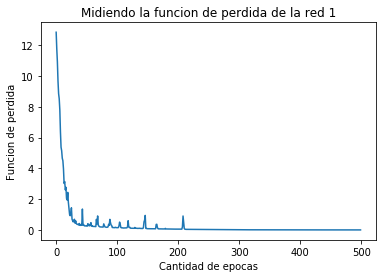

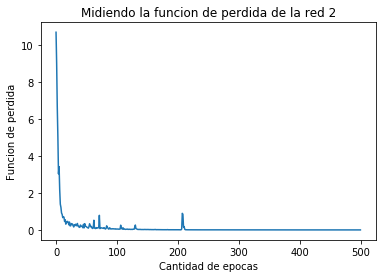

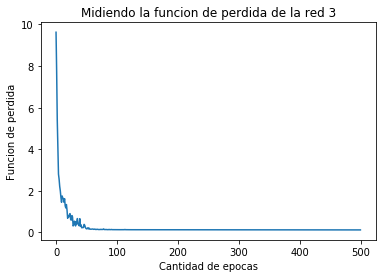

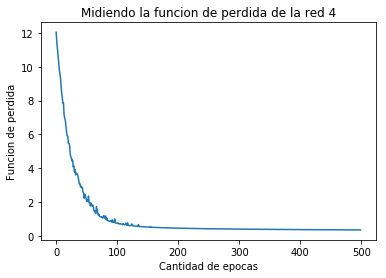

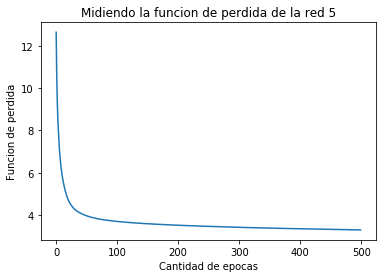

In [0]:

import matplotlib.pyplot as plt

plt.plot(range(len(perdida)),perdida)
plt.ylabel('Funcion de perdida')
plt.xlabel('Cantidad de epocas')
plt.title("Midiendo la funcion de perdida de la red 1")
plt.show()



plt.plot(range(len(perdida2)),perdida2)
plt.ylabel('Funcion de perdida')
plt.xlabel('Cantidad de epocas')
plt.title("Midiendo la funcion de perdida de la red 2")
plt.show()


plt.plot(range(len(perdida3)),perdida3)
plt.ylabel('Funcion de perdida')
plt.xlabel('Cantidad de epocas')
plt.title("Midiendo la funcion de perdida de la red 3")
plt.show()

plt.plot(range(len(perdida4)),perdida4)
plt.ylabel('Funcion de perdida')
plt.xlabel('Cantidad de epocas')
plt.title("Midiendo la funcion de perdida de la red 4")
plt.show()

plt.plot(range(len(perdida5)),perdida5)
plt.ylabel('Funcion de perdida')
plt.xlabel('Cantidad de epocas')
plt.title("Midiendo la funcion de perdida de la red 5")
plt.show()

## 4e) Opcional: Optimizando tu red para MNIST

In [0]:
"""
import time
import sys 
import numpy as np
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from matplotlib.pyplot import subplots
from random import randint
import random

red_neuronal =  FFNN(784,[32,16],[relu,relu],10)
dataset = MNIST('mnist', train=False, transform=ToTensor(),download=True)
def entrenar_FFNN(red, dataset, epochs=1, batch_size=1, device='cpu'):
  red.to(device)
  data = DataLoader(dataset, batch_size, shuffle=True)
  perdida = []
  tiempo_epochs = 0
  for e in range(1,epochs+1):  
    print(e)
    inicio_epoch = time.clock()
    #TRAINING
    k=0
    m=[]
    for x,y in data:   
      if k < 5: 
        m += [x]
        m += [y]
        k+=1
        pass
      x, y = x.to(device), y.to(device)
      y_pred = red.forward(x)
      zeros = torch.zeros(batch_size,10)
      for i in range(batch_size):
        zeros[i][y[i]]=1
      zeros.to(device)
      red.backward(x,zeros,y_pred)
      L = CELoss(y_pred, zeros)
      for p in red.parameters():
        p.data = p.data - 0.001*p.grad
     
     
      #GENERALIZATION
    for i in range(5):
      
      aciertos = 0
      aux = 2*i
      x, y = m[aux].to(device), m[aux+1].to(device)
      y_pred = red.forward(x)
      
      
      for indice,softmaxresult in enumerate(y_pred):
        prediccion = softmaxresult.max(0)[1]
        if prediccion == y[indice]:
          aciertos = aciertos + 1
        
      porcentaje = (aciertos/(len(dataloader)*batch_size))*100
      
      zeros = torch.zeros(batch_size,10)
      for i in range(batch_size):
        zeros[i][y[i]]=1
      zeros.to(device)
      L = CELoss(y_pred, zeros)
      acc = ()
      perdida+=[L]
      

    
  return perdida

perdida = entrenar_FFNN(red_neuronal,dataset,100,100,'cpu')
plt.plot(range(len(perdida)),perdida)

"""

"\nimport time\nimport sys \nimport numpy as np\nfrom torchvision.datasets import MNIST\nfrom torchvision.transforms import ToTensor\nfrom matplotlib.pyplot import subplots\nfrom random import randint\nimport random\n\nred_neuronal =  FFNN(784,[32,16],[relu,relu],10)\ndataset = MNIST('mnist', train=False, transform=ToTensor(),download=True)\ndef entrenar_FFNN(red, dataset, epochs=1, batch_size=1, device='cpu'):\n  red.to(device)\n  data = DataLoader(dataset, batch_size, shuffle=True)\n  perdida = []\n  tiempo_epochs = 0\n  for e in range(1,epochs+1):  \n    print(e)\n    inicio_epoch = time.clock()\n    #TRAINING\n    k=0\n    m=[]\n    for x,y in data:   \n      if k < 5: \n        m += [x]\n        m += [y]\n        k+=1\n        pass\n      x, y = x.to(device), y.to(device)\n      y_pred = red.forward(x)\n      zeros = torch.zeros(batch_size,10)\n      for i in range(batch_size):\n        zeros[i][y[i]]=1\n      zeros.to(device)\n      red.backward(x,zeros,y_pred)\n      L = CELoss(